# Estimation of Obesity Levels Based On Eating Habits and Physical Conditions
Key Features: gender, age, height, weight, eating habits, physical conditon, lifestyle habits \
Source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition \
The estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61

In [26]:
### Verify all libraries are installed in your machine first. 

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np 

# Other libraries that may be useful in the future. 
# import duckdb # for using sql syntax to access a df 
# import pandasql # also for using sql to access df - have slightly different features /advantages"
# import pil # python imaging library for opening, manipulating and saving images

## Functions that may be useful. 
## %%sql

In [2]:
df = pd.read_csv("DataSets/UCI_ObesityDataSet.csv")
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Rename labels for easy readability and intuitive data access. 
df = df.rename(columns = {'Gender':'gender', 'Age':'age', 'Height':'height', 'Weight':'Weight','FAVC':'eat_high_calorie_frequently', 
                          'FCVC':'eat_vegetables_usually', 'NCP':'daily_meal_count', 'CAEC':'snack_between_meals', 'SMOKE':'smoke', 
                          'CH2O':'daily_water_intake', 'SCC':'monitor_calories', 'FAF':'activity_frequency', 'TUE':'time_on_technology', 
                          'CALC':'alcohol_frequency','MTRANS':'transportation', 'NObeyesdad':'obesity_level'})
df.head()

,gender,age,height,Weight,family_history_with_overweight,eat_high_calorie_frequently,eat_vegetables_usually,daily_meal_count,snack_between_meals,smoke,daily_water_intake,monitor_calories,activity_frequency,time_on_technology,alcohol_frequency,transportation,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:
cell_count = df.size
row_count = df.shape[0]
column_count = df.shape[1]

print(cell_count)
print(row_count)
print(column_count)

35887
2111
17


In [35]:
df.describe()

,age,height,Weight,eat_vegetables_usually,daily_meal_count,daily_water_intake,activity_frequency,time_on_technology
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Relative Risk 
* Calculate RR of being obese if female vs male
* RR of of being obese if counting calories vs not
* RR of being obese if drinking alcohol vs not
* RR of walking vs not 

In [42]:
#Relative risk of obesity if female vs

target_obesity_levels = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

male_obese = df[(df['gender'] == 'Male') & (df['obesity_level'].isin(target_obesity_levels))] #creates new df that contains only males with obesity

female_obese = df[(df['gender'] == 'Female') & (df['obesity_level'].isin(target_obesity_levels))] #creates new df that contains only females with obesity

totalMales = df[(df['gender'] == 'Male')] #creates a new df with only males

totalFemales = df[(df['gender'] == 'Female')] #creates a new df with only females 

count_male_obese = len(male_obese) #total males with obesity 
print(count_male_obese)

count_female_obese = len(female_obese) #total males with obesity 
print(count_female_obese) #total females with obesity

print(len(df)) #total number of individuals in set

riskMale = count_male_obese / len(totalMales) #risk of obesity in males
print(riskMale)

riskFemale = count_female_obese / len(totalFemales) #risk of obesity in females
print(riskFemale/riskMale)

#Risk of obesity among males and females are about the same


491
481
2111
0.4597378277153558
1.0031145469847476


In [41]:
#RR of being obese if counting calories vs not counting calories

target_obesity_levels = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

#total number of individuals that count calories
countCalories = len(df[df['monitor_calories'] == 'yes'])

#number of individuals that count calories and have obesity
countCaloriesAndObesity = len(df[(df['monitor_calories'] == 'yes') & (df['obesity_level'].isin(target_obesity_levels))])

countCaloriesNoObesity = countCalories-countCaloriesAndObesity

print(countCalories)
print(countCaloriesAndObesity)
print(countCaloriesNoObesity )

#total number of dont individuals that count calories
noCountCalories = len(df[df['monitor_calories'] == 'no'])

#number of individuals that dont count calories and have obesity
noCountCaloriesAndObesity = len(df[(df['monitor_calories'] == 'no') & (df['obesity_level'].isin(target_obesity_levels))])

noCountCaloriesNoObesity = noCountCalories-noCountCaloriesAndObesity

print(noCountCalories)
print(noCountCaloriesAndObesity)
print(noCountCaloriesNoObesity)

rrCount = countCaloriesAndObesity / countCalories #risk for counting calories

rrNoCount = noCountCaloriesAndObesity / noCountCaloriesAndObesity #risk for not counting calories

rr = rrCount / rrNoCount #risk factor for counting calories vs not counting calories
print(rr)

96
3
93
2015
969
1046
0.03125


In [43]:
#RR of being obese if drinking alcohol vs not
#This will take into account individuals that dont drink, drink sometimes, and drink frequently 

target_obesity_levels = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

#number of individuals that sometimes drink alcohol and have obesity
sometimesDrinkAndObesity = len(df[(df['alcohol_frequency'] == 'Sometimes') & (df['obesity_level'].isin(target_obesity_levels))]) 

#number of individuals that sometimes drink alcohol and dont have obesity
sometimesDrinkAndNoObesity = len(df[(df['alcohol_frequency'] == 'Sometimes') & (~df['obesity_level'].isin(target_obesity_levels))])
print(len(df[df['alcohol_frequency'] == 'Sometimes']))
print(sometimesDrinkAndObesity)
print(sometimesDrinkAndNoObesity)

#number of individuals that sometimes drink alcohol and have obesity
noDrinkAndObesity = len(df[(df['alcohol_frequency'] == 'no') & (df['obesity_level'].isin(target_obesity_levels))]) 

#number of individuals that sometimes drink alcohol and dont have obesity
noDrinkAndNoObesity = len(df[(df['alcohol_frequency'] == 'no') & (~df['obesity_level'].isin(target_obesity_levels))])

#number of individuals that sometimes drink alcohol and have obesity
yesDrinkAndObesity = len(df[(df['alcohol_frequency'] == 'Frequently') & (df['obesity_level'].isin(target_obesity_levels))]) 

#number of individuals that sometimes drink alcohol and dont have obesity
yesDrinkAndNoObesity = len(df[(df['alcohol_frequency'] == 'Frequently') & (~df['obesity_level'].isin(target_obesity_levels))])

rr1 = (sometimesDrinkAndObesity/(sometimesDrinkAndObesity+sometimesDrinkAndNoObesity))/(noDrinkAndObesity/(noDrinkAndObesity+noDrinkAndNoObesity))
print(rr1)

rr2 = (yesDrinkAndObesity/(yesDrinkAndObesity+yesDrinkAndNoObesity))/(noDrinkAndObesity/(noDrinkAndObesity+noDrinkAndNoObesity))
print(rr2)


1401
719
682
1.3837042257338787
0.6162748643761301


In [40]:
#RR of walking vs not (public transport and automobile)

target_obesity_levels = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']


publicAndObesity = len(df[(df['transportation'] == 'Public_Transportation') & (df['obesity_level'].isin(target_obesity_levels))]) 
publicAndNoObesity = len(df[(df['transportation'] == 'Public_Transportation') & (~df['obesity_level'].isin(target_obesity_levels))])


walkingAndObesity = len(df[(df['transportation'] == 'Walking') & (df['obesity_level'].isin(target_obesity_levels))]) 
walkingAndNoObesity = len(df[(df['transportation'] == 'Walking') & (~df['obesity_level'].isin(target_obesity_levels))])


autoAndObesity = len(df[(df['transportation'] == 'Automobile') & (df['obesity_level'].isin(target_obesity_levels))]) 
autoAndNoObesity = len(df[(df['transportation'] == 'Automobile') & (~df['obesity_level'].isin(target_obesity_levels))])

rr1 = (publicAndObesity/(publicAndObesity+publicAndNoObesity))/(walkingAndObesity/(walkingAndObesity+walkingAndNoObesity))
print(rr1)

rr2 = (autoAndObesity/(autoAndObesity+autoAndNoObesity))/(walkingAndObesity/(walkingAndObesity+walkingAndNoObesity))
print(rr2)

8.967088607594937
8.414296134208607


# Plotting variables with respect to obesity level

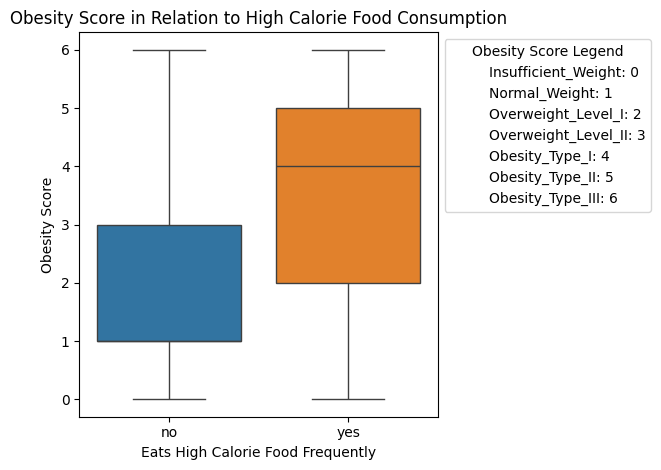

eat_high_calorie_frequently
no     1.755102
yes    3.290461
Name: obesity_score, dtype: float64


In [34]:
#Obesity Score in Relation to High Calorie Food Consumption
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df['obesity_score'] = df['obesity_level'].map(obesity_mapping)


sns.boxplot(data=df, x='eat_high_calorie_frequently', y='obesity_score', hue='eat_high_calorie_frequently')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}', markerfacecolor='gray', markersize=0)
    for k, v in obesity_mapping.items()
]

# Add to plot
plt.legend(handles=legend_elements, title='Obesity Score Legend', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Obesity Score in Relation to High Calorie Food Consumption')
plt.xlabel('Eats High Calorie Food Frequently')
plt.ylabel('Obesity Score')
plt.tight_layout()
plt.show()

group_means = df.groupby('eat_high_calorie_frequently')['obesity_score'].mean()
print(group_means)


C:\Users\brand\AppData\Local\Temp\ipykernel_43120\3226737403.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='eat_vegetables_usually', y='obesity_score', palette="coolwarm")


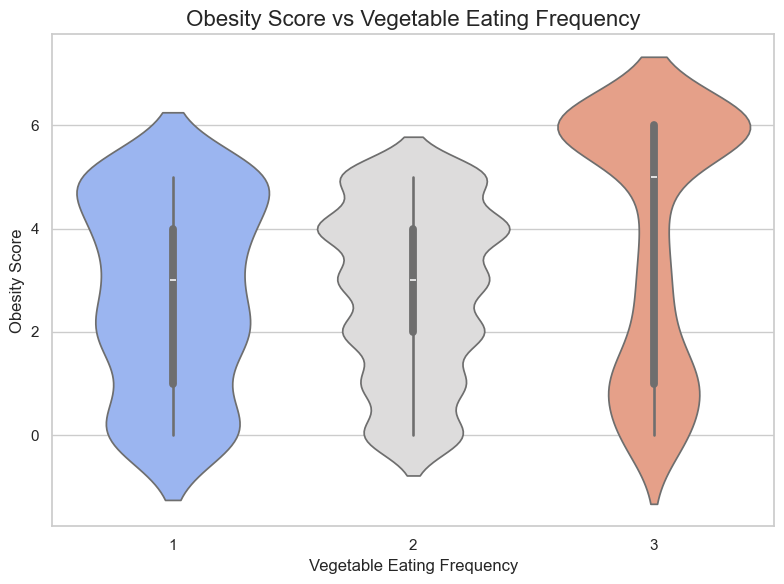

In [64]:
# How often an individual eats vegetables vs obesity level
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['eat_vegetables_usually'] = df['eat_vegetables_usually'].astype(int)
df['obesity_score'] = df['obesity_level'].map(obesity_mapping)

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='eat_vegetables_usually', y='obesity_score', palette="coolwarm")

plt.title('Obesity Score vs Vegetable Eating Frequency', fontsize=16)
plt.xlabel('Vegetable Eating Frequency', fontsize=12)
plt.ylabel('Obesity Score', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_43120\3685545847.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='daily_meal_count', y='obesity_score', palette='Set2')


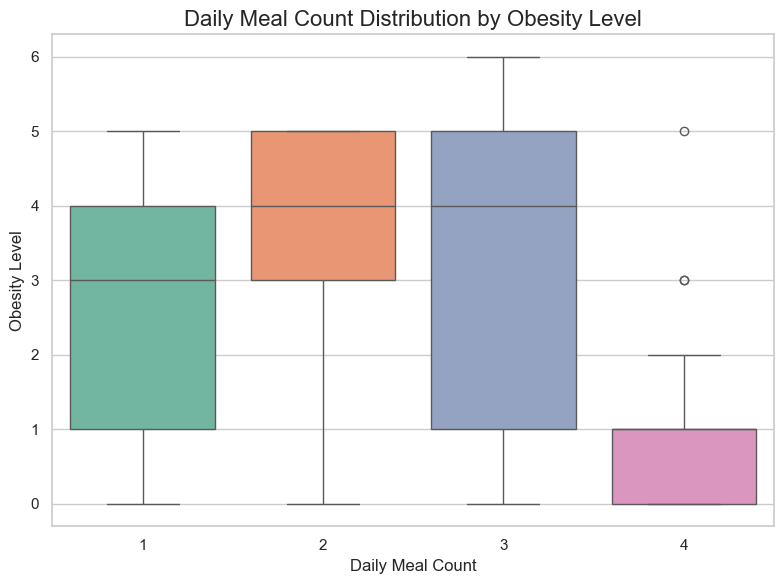

C:\Users\brand\AppData\Local\Temp\ipykernel_43120\3685545847.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='daily_meal_count', y='obesity_score', palette='Set2')


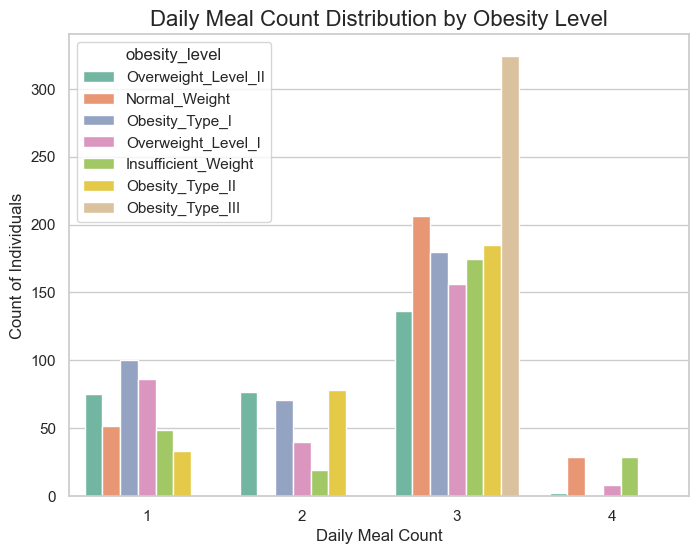

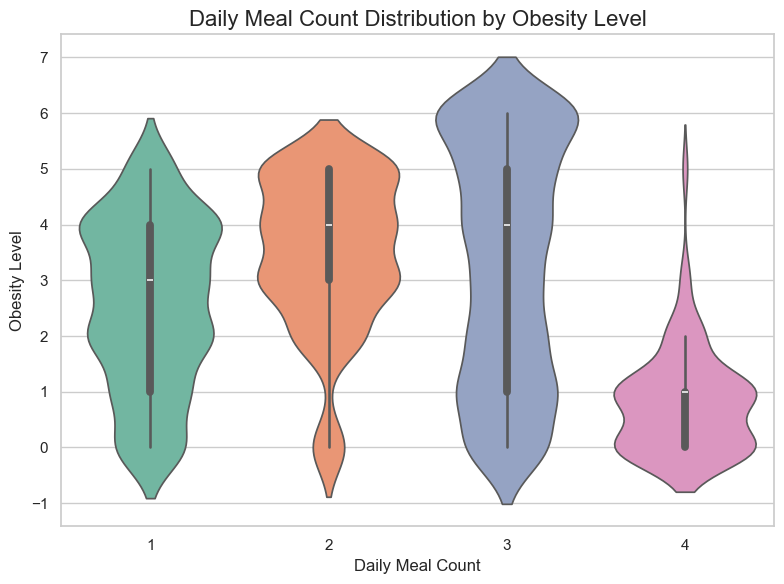

In [70]:
# daily meal count vs obesity level
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['daily_meal_count'] = df['daily_meal_count'].astype(int)
df['obesity_score'] = df['obesity_level'].map(obesity_mapping)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='daily_meal_count', y='obesity_score', palette='Set2')

# Title and labels
plt.title('Daily Meal Count Distribution by Obesity Level', fontsize=16)
plt.ylabel('Obesity Level', fontsize=12)
plt.xlabel('Daily Meal Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

sns.set(style="whitegrid", palette="muted")

# Create a barplot to show the daily meal count distribution by obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='daily_meal_count', hue='obesity_level', palette='Set2')

# Title and labels
plt.title('Daily Meal Count Distribution by Obesity Level', fontsize=16)
plt.xlabel('Daily Meal Count', fontsize=12)
plt.ylabel('Count of Individuals', fontsize=12)

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='daily_meal_count', y='obesity_score', palette='Set2')

# Title and labels
plt.title('Daily Meal Count Distribution by Obesity Level', fontsize=16)
plt.ylabel('Obesity Level', fontsize=12)
plt.xlabel('Daily Meal Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Chi-Squared Tests
* Independence - can check independence for: (gender, obesity), (water, obesity), (water, meal_count), (alcohol, obesity)
* Goodness of fit ? probably not 
* Homogeneity ? probably not 

# Make Correlation Table to find residuals